<a href="https://colab.research.google.com/github/MeeraSadhu/ASSIGNMENTLETSUPGRADE_ML-submission/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:

df = pd.read_csv('/content/gdrive/My Drive/Dataset IRIS/IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.groupby(df["sepal_length"])["species"].value_counts()

sepal_length  species        
4.3           Iris-setosa        1
4.4           Iris-setosa        3
4.5           Iris-setosa        1
4.6           Iris-setosa        4
4.7           Iris-setosa        2
4.8           Iris-setosa        5
4.9           Iris-setosa        4
              Iris-versicolor    1
              Iris-virginica     1
5.0           Iris-setosa        8
              Iris-versicolor    2
5.1           Iris-setosa        8
              Iris-versicolor    1
5.2           Iris-setosa        3
              Iris-versicolor    1
5.3           Iris-setosa        1
5.4           Iris-setosa        5
              Iris-versicolor    1
5.5           Iris-versicolor    5
              Iris-setosa        2
5.6           Iris-versicolor    5
              Iris-virginica     1
5.7           Iris-versicolor    5
              Iris-setosa        2
              Iris-virginica     1
5.8           Iris-versicolor    3
              Iris-virginica     3
              Iris-setosa

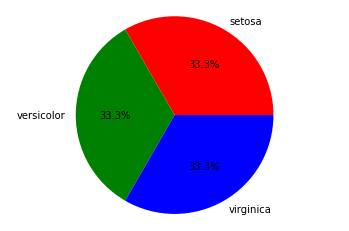

In [10]:
labels='setosa','versicolor','virginica'
colors = ['red','green','blue']
g=df.species.value_counts()
plt.pie(g,labels=labels,colors=colors,autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.xticks(rotation=0)
plt.show()

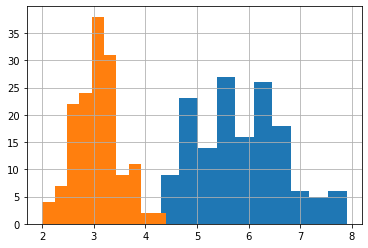

In [11]:
df['sepal_length'].hist()
df['sepal_width'].hist()

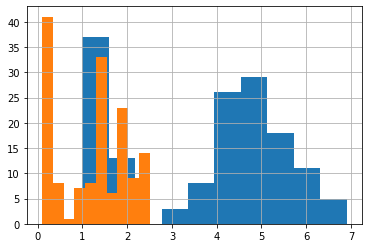

In [12]:
df['petal_length'].hist()
df['petal_width'].hist()

In [13]:
#correlation matrix shows correlation between two variables
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['species'])
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4,random_state=5)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
print("Accuracy: ", model.score(X_test, Y_test) * 100)
YPred=model.predict(X_test)
print(YPred)

Accuracy:  98.33333333333333
[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 2 1 2 2 0 2 0 0 0 0 1 1 1 1 2]


In [23]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
clfr= RandomForestClassifier(random_state = 100)
clfr.fit(x_train, y_train)
Y_pred=clfr.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, Y_pred))

Accuracy: 0.9555555555555556


In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("random forest confusion matrix :\n",confusion_matrix(y_test,Y_pred))
print("random forest accuracy:\n",accuracy_score(y_test,Y_pred))
print("logistic regression confusion matrix :\n",confusion_matrix(Y_test,YPred))
print("Logistic regression accuracy :\n",accuracy_score(Y_test,YPred))


random forest confusion matrix :
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
random forest accuracy:
 0.9555555555555556
logistic regression confusion matrix :
 [[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
Logistic regression accuracy :
 0.9833333333333333


In [39]:
print("Making predictions ")
print("\n")
print(X.head())
print("The predictions are:\n")
print(model.predict(X.head()))

Making predictions 


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
The predictions are:

[0 0 0 0 0]
